- 找边缘轮廓
  - 建议先灰度化 `cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)`
  - 进行部分高斯模糊 `cv2.GaussianBlur(image, (5, 5), 0)`
  - 在进行边缘检测 `cv2.Canny(image, 50, 150)`
  - 寻找轮廓 `cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)`

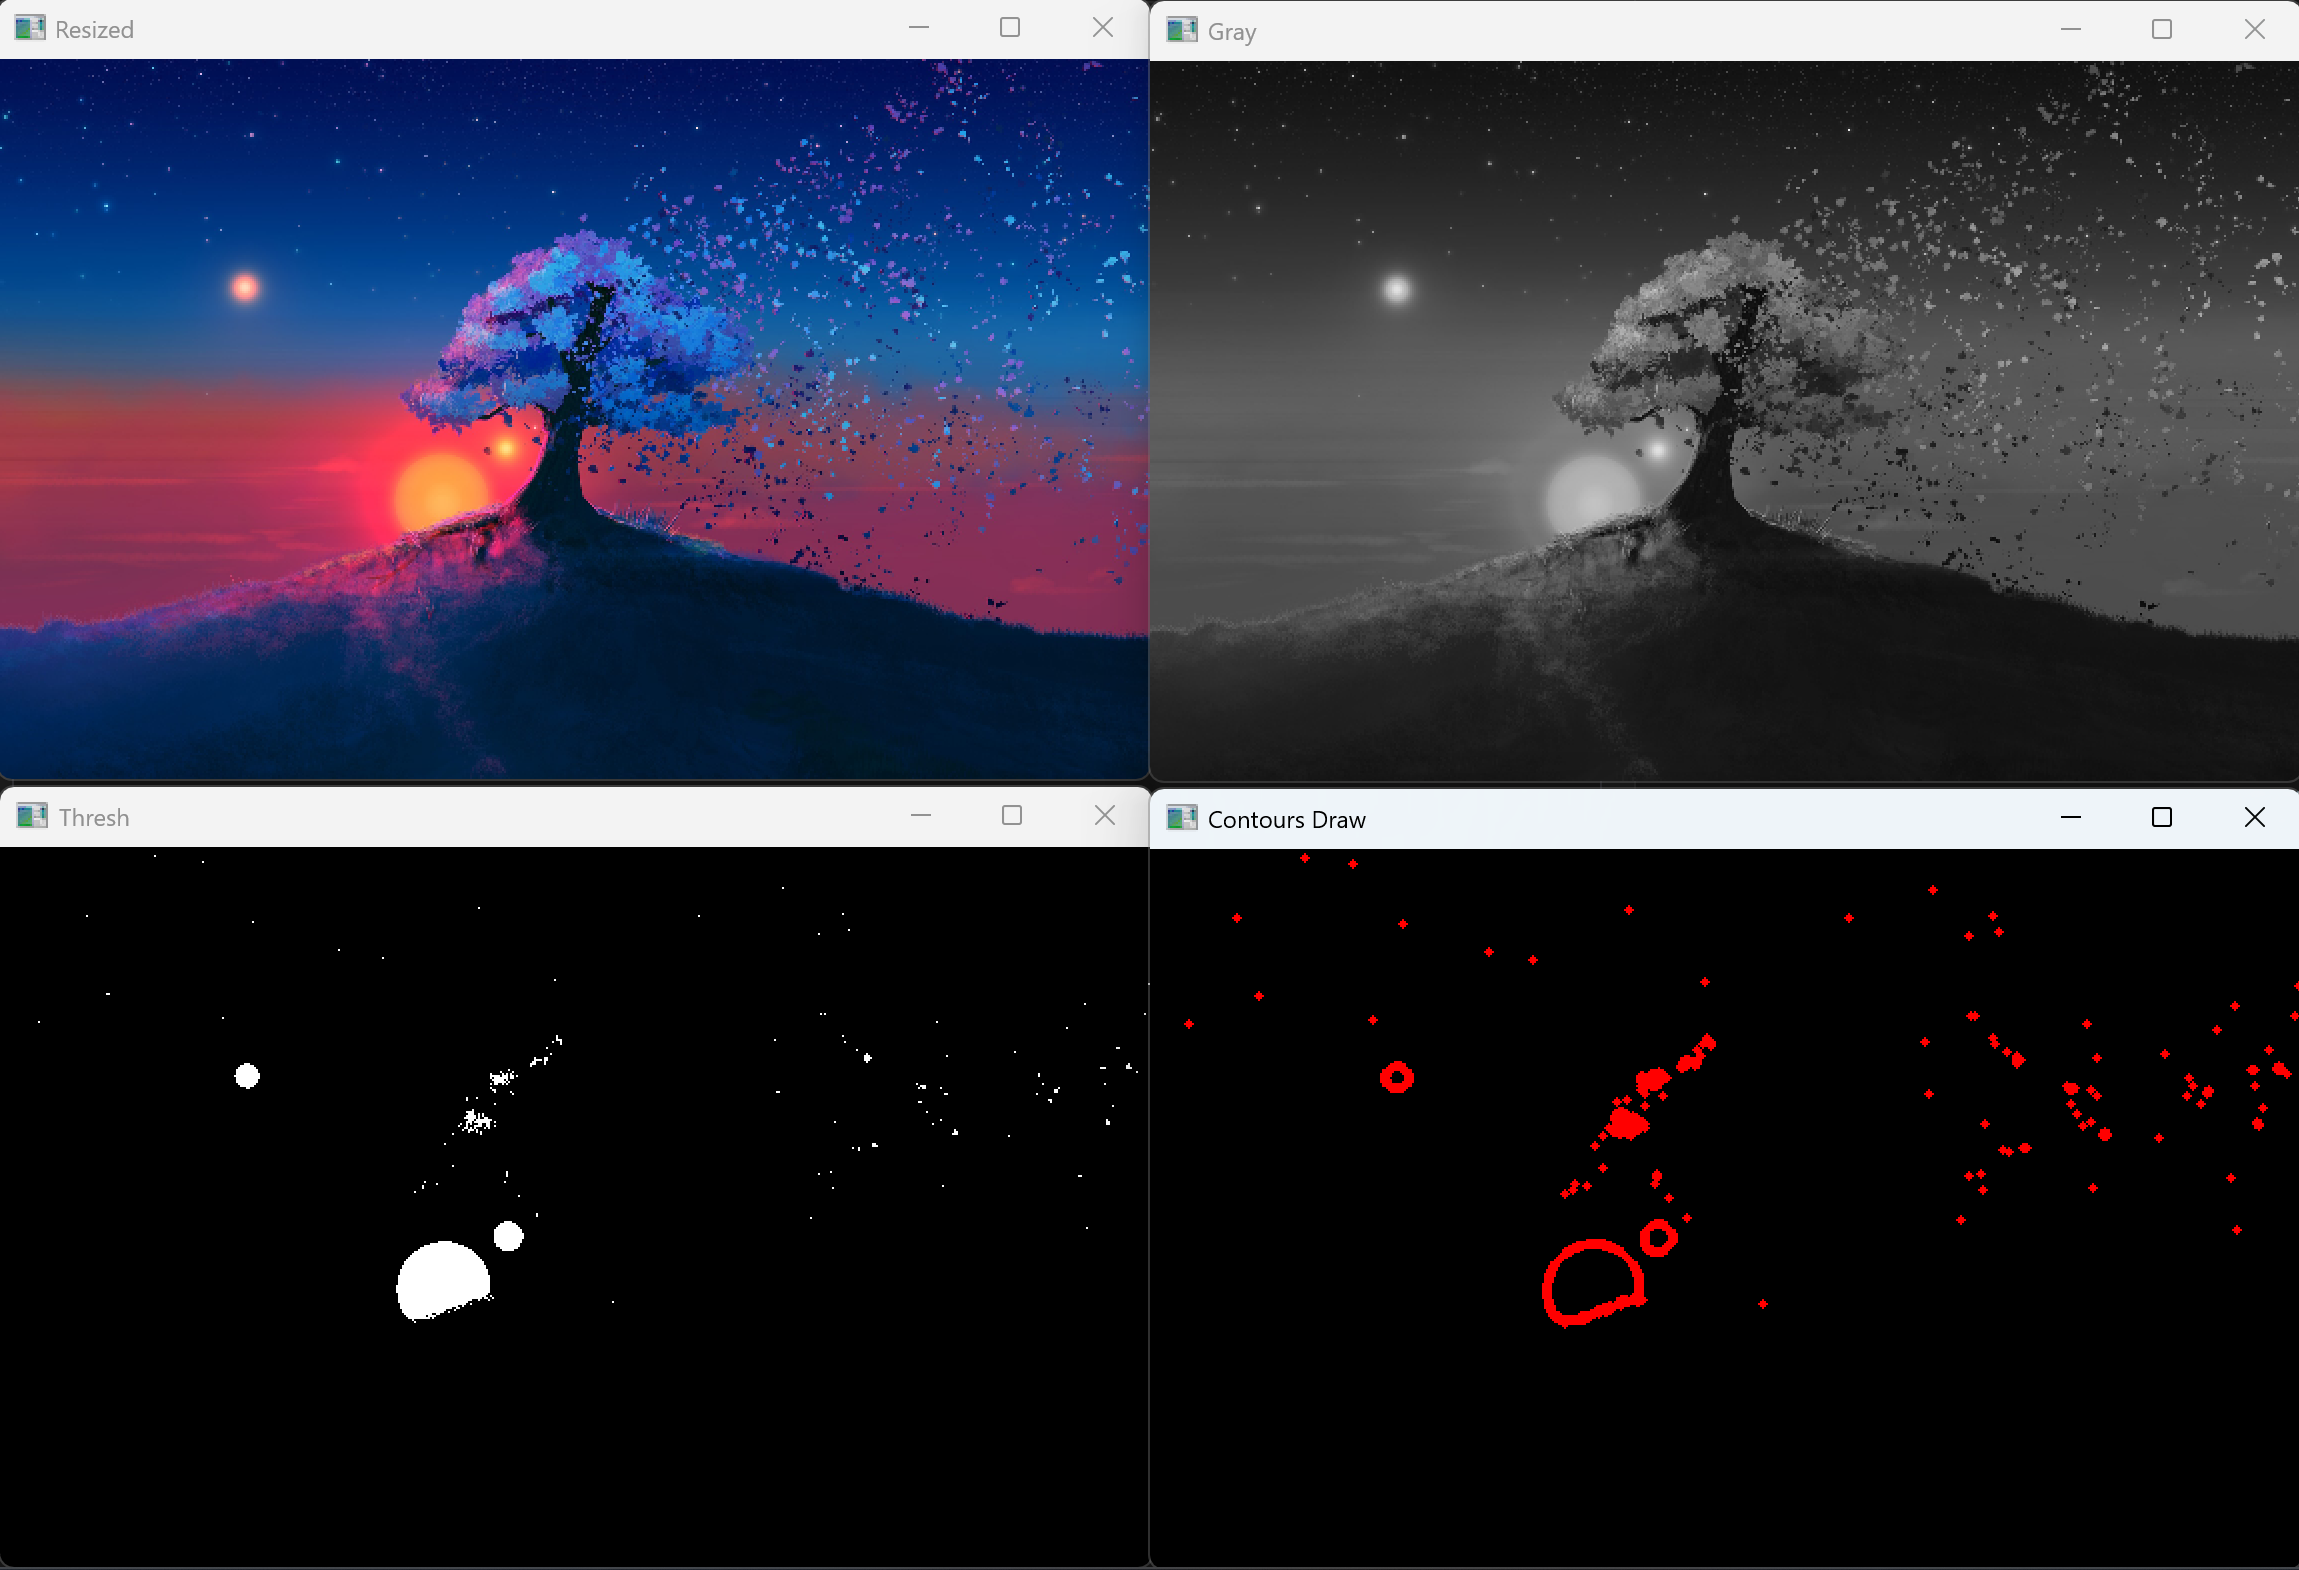

In [3]:
import cv2 as cv
import numpy as np

img = cv.imread("Photos/1.png")
# cv.imshow("image", img)

# resize 缩放
resized = cv.resize(img, None, fx=0.2, fy=0.2)
cv.imshow("Resized", resized)
img = resized

blank = np.zeros(img.shape, dtype="uint8")
cv.imshow("Blank", blank)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

# blur = cv.GaussianBlur(gray, (5, 5), cv.BORDER_DEFAULT)
# cv.imshow("Blur", blur)
# canny = cv.Canny(blur, 125, 175)
# cv.imshow("Canny", canny)

# 阈值化过滤
ret, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
cv.imshow("Thresh", thresh)

# 找轮廓
contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_TC89_L1)
print(f"Number of contours: {len(contours)}")

# 将轮廓绘制在空白图像上
cv.drawContours(blank, contours, -1, (0, 0, 255), 3)
cv.imshow("Contours Draw", blank)

cv.waitKey(0)
cv.destroyAllWindows()

Number of contours: 110
